In [ ]:
# initialization for my classroom
import os
from datetime import datetime as dt

def logfile(user=os.environ.get('JUPYTERHUB_USER') or 'jovyan'):
    prefix='/srv'
    if os.path.isdir(prefix) and os.access(prefix, os.W_OK):
        prefix+=('/'+user)
        if not os.path.isdir(prefix):
            os.makedirs(prefix)
    else:
        prefix='.'
    return prefix+'/'+dt.now().strftime('%Y%m%d')+'.log'

path=logfile()
#%logstop
%logstart -otq $path append

# [python - cannot override sys.excepthook - Stack Overflow](https://stackoverflow.com/questions/1261668/cannot-override-sys-excepthook/28758396)
# https://github.com/ipython/ipython/blob/e6432249582e05f438303ce73d082a0351bb383e/IPython/core/interactiveshell.py#L1952

import sys
import traceback
import IPython

try:
    _showtraceback
except NameError:
    _showtraceback=IPython.core.interactiveshell.InteractiveShell.showtraceback

try:
    _showsyntaxerror
except NameError:
    _showsyntaxerror=IPython.core.interactiveshell.InteractiveShell.showsyntaxerror

import logging
logging.basicConfig(filename=path.replace('.log','-exc.log'), format='%(asctime)s %(message)s', level=logging.ERROR, force=True)

import sys
import traceback
import IPython

def showtraceback(self, *args, **kwargs):
    etype, value, tb = self._get_exc_info(kwargs.get('exc_tuple'))
    stb = self.InteractiveTB.structured_traceback(
        etype, value, tb, tb_offset=kwargs.get('tb_offset'))
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showtraceback(self, *args, **kwargs)

def showsyntaxerror(self, *args, **kwargs):
    etype, value, last_traceback = self._get_exc_info()
    elist = traceback.extract_tb(last_traceback) if kwargs.get('running_compiled_code') else []
    stb = self.SyntaxTB.structured_traceback(etype, value, elist)
    logging.error(os.environ.get('JUPYTERHUB_USER') or 'jovyan')
    logging.error(self.InteractiveTB.stb2text(stb))
    _showsyntaxerror(self, *args, **kwargs)

IPython.core.interactiveshell.InteractiveShell.showtraceback = showtraceback
IPython.core.interactiveshell.InteractiveShell.showsyntaxerror = showsyntaxerror

# YBC 7289 (3)

## The Maths Book: "The Renaissance"

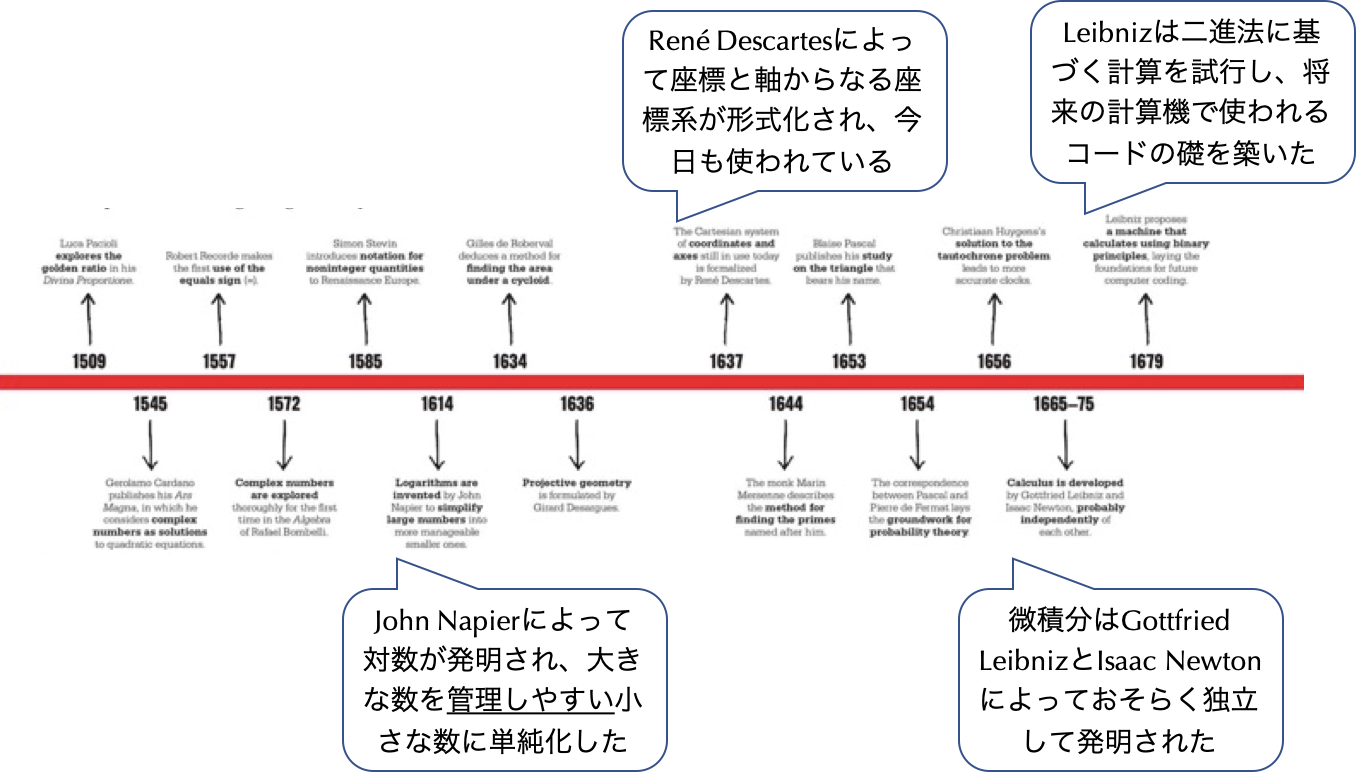

* (1614)
  - **Logarithms are invented** by John Napier to **simplify large numbers** into more manageable smaller ones.
* (1637)
  - The Cartesian system of **coordinates and axes** still in use today is formalized by Rene Decartes.
* (1665-75)
  - **Calculus is developed** by Gottfried Leibniz and Isaac Newton, **probably independently** of each other.

* [Newton's method - Wikipedia](https://en.wikipedia.org/wiki/Newton%27s_method)

$$
  f'(x_{n}) = \frac{f(x_{n}) - 0}{x_{n} - x_{n+1}}
$$

$$
  x_{n+1} = x_{n} -  \frac{f(x_{n})}{f'(x_{n})}
$$

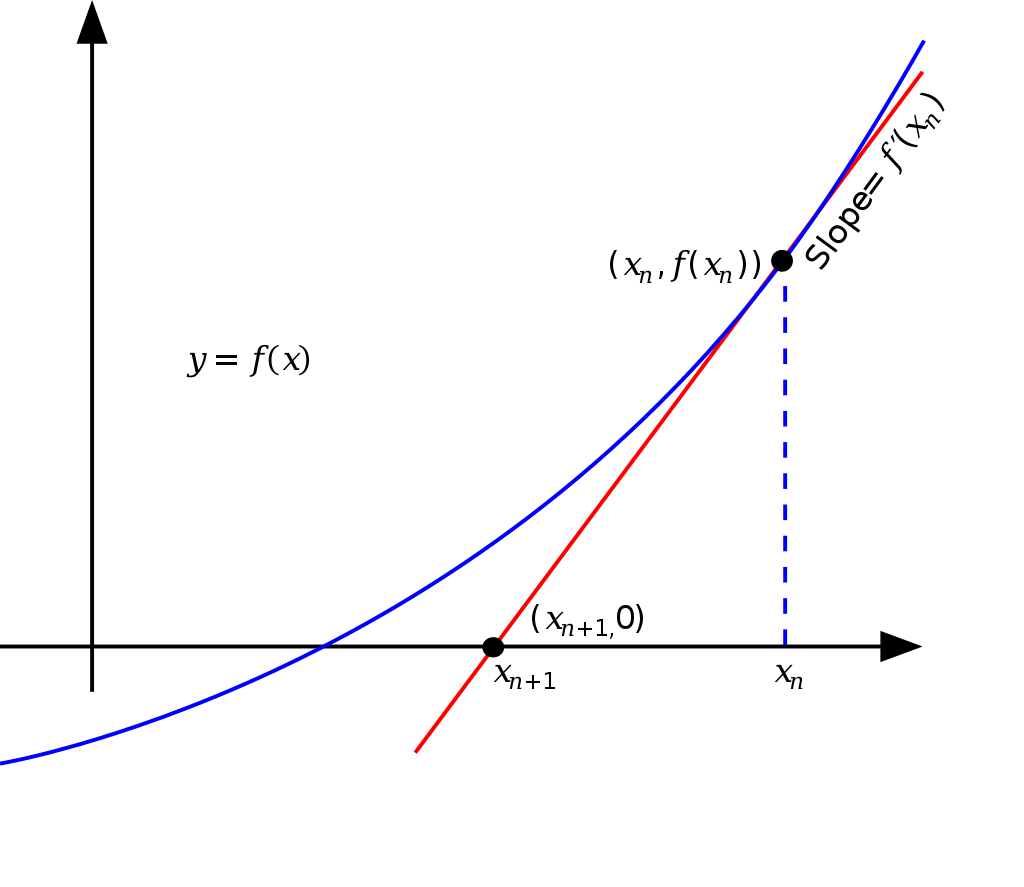

$f(x) = x^2-2$のとき、$f'(x)=2 x$

$$
  \begin{align}
    x_{n+1} & = x_{n} -  \frac{{x_{n}}^2-2}{2x_{n}} \\
            & = \frac{1}{2}\left(x_{n}+\frac{2}{x_{n}}\right)
  \end{align}
$$

In [1]:
def f(x):
    return (x+2/x)/2

x, c = 2, 6
for i in range(c):
    x = f(x)
    print(x, x**2)

import math
math.sqrt(2), math.sqrt(2)**2

1.5 2.25
1.4166666666666665 2.006944444444444
1.4142156862745097 2.0000060073048824
1.4142135623746899 2.0000000000045106
1.414213562373095 1.9999999999999996
1.414213562373095 1.9999999999999996


(1.4142135623730951, 2.0000000000000004)